<a href="https://colab.research.google.com/github/akash231102/akash-image-classification-mini-project/blob/main/covid_analysis_majorproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload

In [ ]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/dataset/owid-covid-data.xlsx')
df


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95266,ZWE,Africa,Zimbabwe,2021-06-08,39321.0,83.0,46.143,1617.0,6.0,2.571,2645.576,5.584,3.105,108.794,0.404,0.173,1.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2983.0,567969.0,38.214,0.201,2110.0,0.142,0.022,45.7,tests performed,1078809.0,689397.0,389412.0,4838.0,6790.0,7.26,4.64,2.62,457.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
95267,ZWE,Africa,Zimbabwe,2021-06-09,39432.0,111.0,57.286,1622.0,5.0,3.286,2653.044,7.468,3.854,109.131,0.336,0.221,1.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3427.0,571396.0,38.444,0.231,2231.0,0.150,0.026,38.9,tests performed,1083983.0,689920.0,394063.0,5174.0,6253.0,7.29,4.64,2.65,421.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
95268,ZWE,Africa,Zimbabwe,2021-06-10,39496.0,64.0,57.714,1626.0,4.0,3.143,2657.350,4.306,3.883,109.400,0.269,0.211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2841.0,574237.0,38.636,0.191,2377.0,0.160,0.024,41.2,tests performed,1089506.0,690452.0,399054.0,5523.0,5857.0,7.33,4.65,2.68,394.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.

In [ ]:
#Questions
•Which country/state is having highest number of cases?
•Which country/state is having lowest number of cases?
•Which country/state is having lowest number of deaths?
•Which country/state is having highest number of deaths?
•Which country/state is most vaccinated?
'''

'•Which country/state is having highest number of cases?\n•Which country/state is having lowest number of cases?\n•Which country/state is having lowest number of deaths?\n•Which country/state is having highest number of deaths?\n•Which country/state is most vaccinated?\n'

In [ ]:
#not countries
a=['Asia','Africa','Europe','International','European Union','North America','South America','World']

In [ ]:
#removing rows with continents, world, international etc. Those which are not countries
for i in list(df[df['location'].isin(a)].index):
    df.drop([i],inplace=True)
#sorting the dataframe according to the latest date of the Data set
d=df[df['date']=='2021-06-05']  

In [ ]:
#country with highest number of cases
list(d[d['total_cases']==max(d.total_cases)]['location'])

['United States']

In [ ]:
#country with least number of cases
list(d[d['total_cases']==min(d.total_cases)]['location'])

['Micronesia (country)']

In [ ]:
#country with least number of deaths
list(d[d['total_deaths']==min(d.total_deaths)]['location'])

['Bhutan', 'Grenada', 'Vanuatu']

In [ ]:
#country with highest number of deaths
list(d[d['total_deaths']==max(d.total_deaths)]['location'])

['United States']

In [ ]:
#country with most vaccinations
list(d[d['total_vaccinations']==max(df[['location','total_vaccinations']].dropna().total_vaccinations)]['location'])

[]

In [ ]:
df.shape

(91278, 60)

In [ ]:
df.isnull().sum()

iso_code                                     0
continent                                  505
location                                     0
date                                         0
total_cases                               3105
new_cases                                 3112
new_cases_smoothed                        4075
total_deaths                             12970
new_deaths                               12935
new_deaths_smoothed                       4075
total_cases_per_million                   3105
new_cases_per_million                     3112
new_cases_smoothed_per_million            4075
total_deaths_per_million                 12970
new_deaths_per_million                   12935
new_deaths_smoothed_per_million           4075
reproduction_rate                        15287
icu_patients                             81641
icu_patients_per_million                 81641
hosp_patients                            79296
hosp_patients_per_million                79296
weekly_icu_ad

In [ ]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [ ]:
df=df.drop(['new_deaths_smoothed','continent','reproduction_rate','weekly_icu_admissions_per_million', 'weekly_hosp_admissions','icu_patients','hosp_patients','hosp_patients_per_million','weekly_icu_admissions','weekly_icu_admissions_per_million','weekly_hosp_admissions','weekly_hosp_admissions_per_million','tests_units','people_vaccinated','new_vaccinations','people_vaccinated','new_vaccinations_smoothed','total_vaccinations_per_hundred','people_vaccinated_per_hundred','new_vaccinations_smoothed_per_million','stringency_index','population','population_density','median_age','aged_70_older','handwashing_facilities','hospital_beds_per_thousand'],axis=1)

In [ ]:
df.shape

(91278, 36)

In [ ]:
df.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'icu_patients_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
       'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
       'aged_65_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'life_expectancy', 'human_development_index',
       'excess_mortality'],
      dtype='object')

In [ ]:
a=df.location.unique()
a

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faeroe Isl

In [ ]:
# to remove the Nan values from the table
df=df.fillna(0)

In [ ]:
df.isnull().sum()

iso_code                               0
location                               0
date                                   0
total_cases                            0
new_cases                              0
new_cases_smoothed                     0
total_deaths                           0
new_deaths                             0
total_cases_per_million                0
new_cases_per_million                  0
new_cases_smoothed_per_million         0
total_deaths_per_million               0
new_deaths_per_million                 0
new_deaths_smoothed_per_million        0
icu_patients_per_million               0
new_tests                              0
total_tests                            0
total_tests_per_thousand               0
new_tests_per_thousand                 0
new_tests_smoothed                     0
new_tests_smoothed_per_thousand        0
positive_rate                          0
tests_per_case                         0
total_vaccinations                     0
people_fully_vac

In [ ]:
df.head(10)

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,icu_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index,excess_mortality
0,AFG,Afghanistan,2020-02-24,1.0,1.0,0.000,0.0,0.0,0.026,0.026,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.581,1803.987,0.0,597.029,9.59,0.0,0.0,64.83,0.511,0.0
1,AFG,Afghanistan,2020-02-25,1.0,0.0,0.000,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.581,1803.987,0.0,597.029,9.59,0.0,0.0,64.83,0.511,0.0
2,AFG,Afghanistan,2020-02-26,1.0,0.0,0.000,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.581,1803.987,0.0,597.029,9.59,0.0,0.0,64.83,0.511,0.0
3,AFG,Afghanistan,2020-02-27,1.0,0.0,0.000,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.581,1803.987,0.0,597.029,9.59,0.0,0.0,64.83,0.511,0.0
4,AFG,Afghanistan,2020-02-28,1.0,0.0,0.000,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.581,1803.987,0.0,597.029,9.59,0.0,0.0,64.83,0.511,0.0
5,AFG,Afghanistan,2020-02-29,1.0,0.0,0.143,0.0,0.0,0.026,0.000,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.581,1803.987,0.0,597.029,9.59,0.0,0.0,64.83,0.511,0.0
6,AFG,Afghanistan,2020-03-01,1.0,0.0,0.143,0.0,0.0,0.026,0.000,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.581,1803.987,0.0,597.029,9.59,0.0,0.0,64.83,0.511,0.0
7,AFG,Afghanistan,2020-03-02,1.0,0.0,0.000,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.581,1803.987,0.0,597.029,9.59,0.0,0.0,64.83,0.511,0.0
8,AFG,Afghanistan,2020-03-03,2.0,1.0,0.143,0.0,0.0,0.051,0.026,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.581,1803.987,0.0,597.029,9.59,0.0,0.0,64.83,0.511,0.0
9,AFG,Afghanistan,2020-03-04,4.0,2.0,0.429,0.0,0.0,0.103,0.051,0.011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.581,1803.987,0.0,597.029,9.59,0.0,0.0,64.83,0.511,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91278 entries, 0 to 95270
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             91278 non-null  object 
 1   location                             91278 non-null  object 
 2   date                                 91278 non-null  object 
 3   total_cases                          91278 non-null  float64
 4   new_cases                            91278 non-null  float64
 5   new_cases_smoothed                   91278 non-null  float64
 6   total_deaths                         91278 non-null  float64
 7   new_deaths                           91278 non-null  float64
 8   total_cases_per_million              91278 non-null  float64
 9   new_cases_per_million                91278 non-null  float64
 10  new_cases_smoothed_per_million       91278 non-null  float64
 11  total_deaths_per_million    

In [ ]:
['date']=pd.to_datetime(df['date'])df

In [ ]:
df.tail(10)

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,icu_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index,excess_mortality
95261,ZWE,Zimbabwe,2021-06-03,39092.0,61.0,34.000,1604.0,5.0,2630.168,4.104,2.288,107.920,0.336,0.115,0.0,1817.0,557596.0,37.516,0.122,1863.0,0.125,0.018,54.8,1048504.0,364340.0,2.45,2.822,1899.775,21.4,307.846,1.82,1.6,30.7,61.49,0.571,0.0
95262,ZWE,Zimbabwe,2021-06-04,39144.0,52.0,32.286,1605.0,1.0,2633.667,3.499,2.172,107.987,0.067,0.125,0.0,2291.0,559887.0,37.670,0.154,1928.0,0.130,0.017,59.7,1056238.0,370674.0,2.49,2.822,1899.775,21.4,307.846,1.82,1.6,30.7,61.49,0.571,0.0
95263,ZWE,Zimbabwe,2021-06-05,39168.0,24.0,33.571,1605.0,0.0,2635.282,1.615,2.259,107.987,0.000,0.106,0.0,1932.0,561819.0,37.800,0.130,1914.0,0.129,0.018,57.0,1061951.0,375315.0,2.53,2.822,1899.775,21.4,307.846,1.82,1.6,30.7,61.49,0.571,0.0
95264,ZWE,Zimbabwe,2021-06-06,39189.0,21.0,35.000,1606.0,1.0,2636.695,1.413,2.355,108.054,0.067,0.115,0.0,1048.0,562867.0,37.871,0.071,1955.0,0.132,0.018,55.9,1068107.0,380786.0,2.56,2.822,1899.775,21.4,307.846,1.82,1.6,30.7,61.49,0.571,0.0
95265,ZWE,Zimbabwe,2021-06-07,39238.0,49.0,39.571,1611.0,5.0,2639.991,3.297,2.662,108.390,0.336,0.163,0.0,2119.0,564986.0,38.013,0.143,2024.0,0.136,0.020,51.1,1073971.0,385275.0,2.59,2.822,1899.775,21.4,307.846,1.82,1.6,30.7,61.49,0.571,0.0
95266,ZWE,Zimbabwe,2021-06-08,39321.0,83.0,46.143,1617.0,6.0,2645.576,5.584,3.105,108.794,0.404,0.173,0.0,2983.0,567969.0,38.214,0.201,2110.0,0.142,0.022,45.7,1078809.0,389412.0,2.62,2.822,1899.775,21.4,307.846,1.82,1.6,30.7,61.49,0.571,0.0
95267,ZWE,Zimbabwe,2021-06-09,39432.0,111.0,57.286,1622.0,5.0,2653.044,7.468,3.854,109.131,0.336,0.221,0.0,3427.0,571396.0,38.444,0.231,2231.0,0.150,0.026,38.9,1083983.0,394063.0,2.65,2.822,1899.775,21.4,307.846,1.82,1.6,30.7,61.49,0.571,0.0
95268,ZWE,Zimbabwe,2021-06-10,39496.0,64.0,57.714,1626.0,4.0,2657.350,4.306,3.883,109.400,0.269,0.211,0.0,2841.0,574237.0,38.636,0.191,2377.0,0.160,0.024,41.2,1089506.0,399054.0,2.68,2.822,1899.775,21.4,307.846,1.82,1.6,30.7,61.49,0.571,0.0
95269,ZWE,Zimbabwe,2021-06-11,39688.0,192.0,77.714,1629.0,3.0,2670.268,12.918,5.229,109.602,0.202,0.231,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.00,2.822,1899.775,21.4,307.846,1.82,1.6,30.7,61.49,0.571,0.0
95270,ZWE,Zimbabwe,2021-06-12,39852.0,164.0,97.714,1632.0,3.0,2681.302,11.034,6.574,109.803,0.202,0.260,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.00,2.822,1899.775,21.4,307.846,1.82,1.6,30.7,61.49,0.571,0.0


In [ ]:
df_ind=df[df['location']=='India']
df_ind.tail()

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,icu_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index,excess_mortality
39885,IND,India,2021-06-08,29089069.0,92596.0,111605.286,353528.0,2219.0,21078.969,67.098,80.873,256.179,1.608,1.907,0.0,1873485.0,368207596.0,266.816,1.358,3059334.0,2.217,0.036,27.4,233680929.0,45317035.0,3.28,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645,0.0
39886,IND,India,2021-06-09,29182532.0,93463.0,105792.286,355705.0,2177.0,21146.695,67.727,76.661,257.756,1.578,1.834,0.0,1985967.0,370193563.0,268.255,1.439,2876605.0,2.084,0.037,27.2,236856505.0,45634125.0,3.31,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645,0.0
39887,IND,India,2021-06-10,29274823.0,92291.0,100067.571,363079.0,7374.0,21213.572,66.877,72.513,263.100,5.343,2.316,0.0,2004690.0,372198253.0,269.708,1.453,2630801.0,1.906,0.038,26.3,240281903.0,45955907.0,3.33,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645,0.0
39888,IND,India,2021-06-11,29359155.0,84332.0,94896.571,367081.0,4002.0,21274.682,61.110,68.765,266.000,2.900,2.381,0.0,2044131.0,374242384.0,271.189,1.481,2401220.0,1.740,0.000,0.0,243703242.0,46287589.0,3.35,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645,0.0
39889,IND,India,2021-06-12,29439989.0,80834.0,90092.857,370384.0,3303.0,21333.258,58.575,65.284,268.393,2.393,2.446,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,246188067.0,46532774.0,3.37,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645,0.0


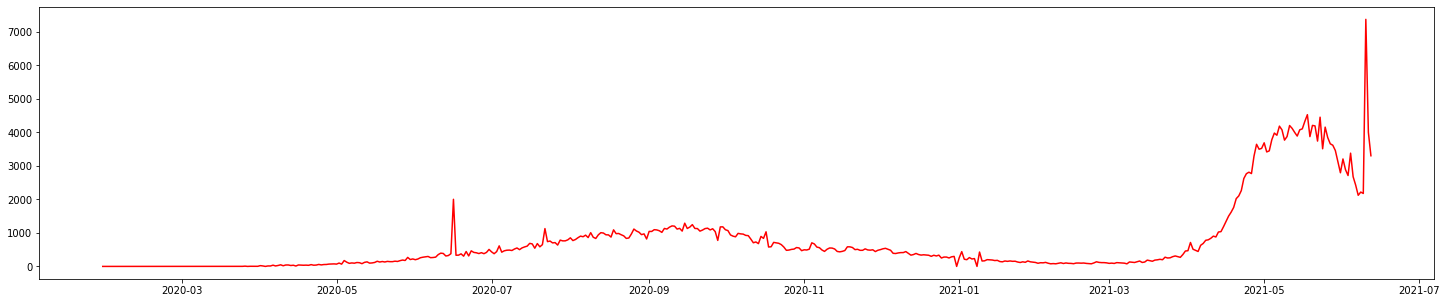

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,5))

plt.plot(df_ind['date'].sort_values(),df_ind['new_deaths'],c='r')

In [ ]:

df_ind=df_ind.rename(columns={'new_deaths':'y','date':'ds'})

df_ind

,iso_code,location,ds,total_cases,new_cases,new_cases_smoothed,total_deaths,y,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,icu_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index,excess_mortality
39390,IND,India,2020-01-30,1.0,1.0,0.000,0.0,0.0,0.001,0.001,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.00,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645,0.0
39391,IND,India,2020-01-31,1.0,0.0,0.000,0.0,0.0,0.001,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.00,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645,0.0
39392,IND,India,2020-02-01,1.0,0.0,0.000,0.0,0.0,0.001,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.00,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645,0.0
39393,IND,India,2020-02-02,2.0,1.0,0.000,0.0,0.0,0.001,0.001,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.00,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645,0.0
39394,IND,India,2020-02-03,3.0,1.0,0.000,0.0,0.0,0.002,0.001,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.00,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39885,IND,India,2021-06-08,29089069.0,92596.0,111605.286,353528.0,2219.0,21078.969,67.098,80.873,256.179,1.608,1.907,0.0,1873485.0,368207596.0,266.816,1.358,3059334.0,2.217,0.036,27.4,233680929.0,45317035.0,3.28,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645,0.0
39886,IND,India,2021-06-09,29182532.0,93463.0,105792.286,355705.0,2177.0,21146.695,67.727,76.661,257.756,1.578,1.834,0.0,1985967.0,370193563.0,268.255,1.439,2876605.0,2.084,0.037,27.2,236856505.0,45634125.0,3.31,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645,0.0
39887,IND,India,2021-06-10,29274823.0,92291.0,100067.571,363079.0,7374.0,21213.572,66.877,72.513,263.100,5.343,2.316,0.0,2004690.0,372198253.0,269.708,1.453,2630801.0,1.906,0.038,26.3,240281903.0,45955907.0,3.33,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645,0.0
39888,IND,India,2021-06-11,29359155.0,84332.0,94896.571,367081.0,4002.0,21274.682,61.110,68.765,266.000,2.900,2.381,0.0,2044131.0,374242384.0,271.189,1.481,2401220.0,1.740,0.000,0.0,243703242.0,46287589.0,3.35,5.989,6426.674,21.2,282.28,10.39,1.9,20.6,69.66,0.645,0.0


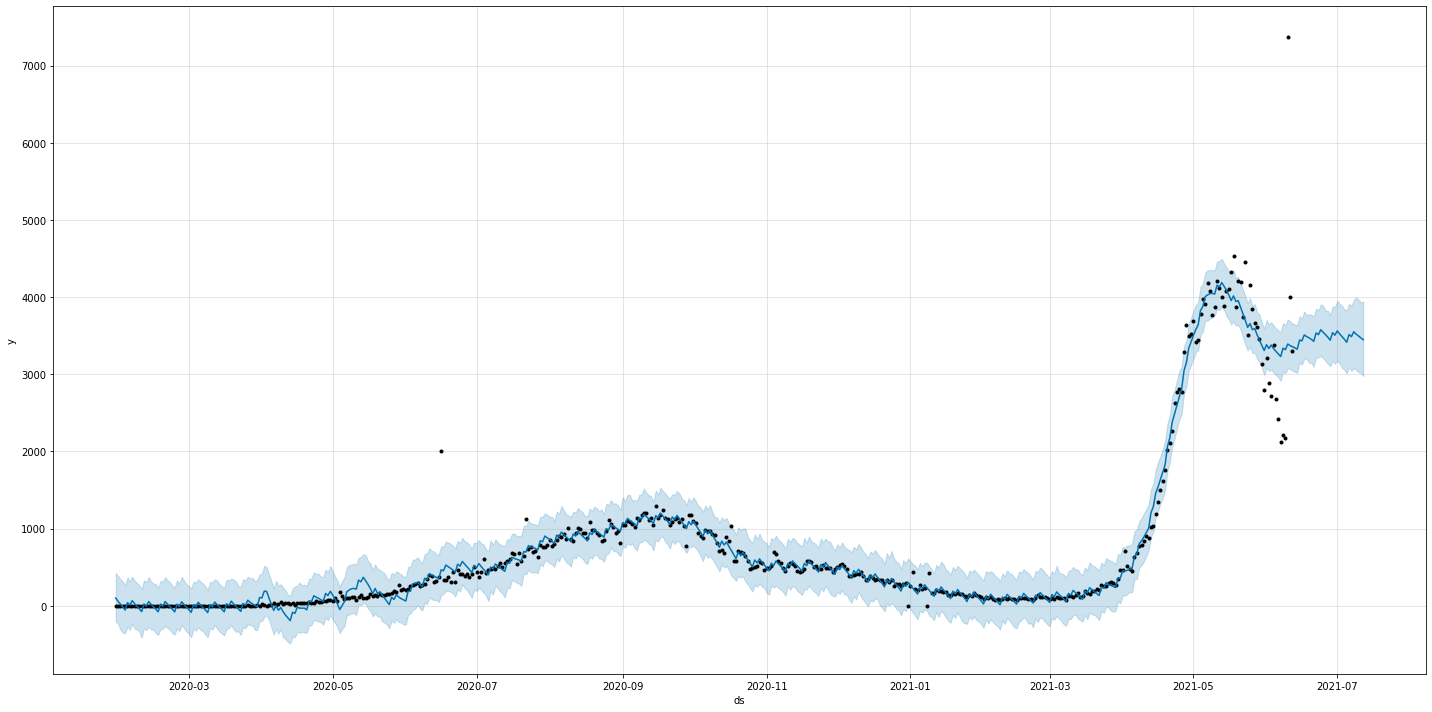

In [ ]:
from fbprophet import Prophet

#forecasting Number of Daily Deaths upto 30 days

model=Prophet(changepoint_prior_scale=1,daily_seasonality=True,yearly_seasonality=True)
model.fit(df_ind)
x=model.make_future_dataframe(periods=30,freq='D')
forecast=model.predict(x)
model.plot(forecast,figsize=(20,10));

In [ ]:
#Trend for 30days
df2=forecast[['ds','trend','yhat']]
df2.tail(30)

,ds,trend,yhat
500,2021-06-13,1457.446786,3343.308542
501,2021-06-14,1466.208045,3324.778488
502,2021-06-15,1474.969303,3443.760228
503,2021-06-16,1483.730562,3432.934331
504,2021-06-17,1492.491821,3510.013280
505,2021-06-18,1501.253079,3489.749215
506,2021-06-19,1510.014338,3472.774945
507,2021-06-20,1518.775596,3453.368712
508,2021-06-21,1527.536855,3426.959361
509,2021-06-22,1536.298114,3535.997115


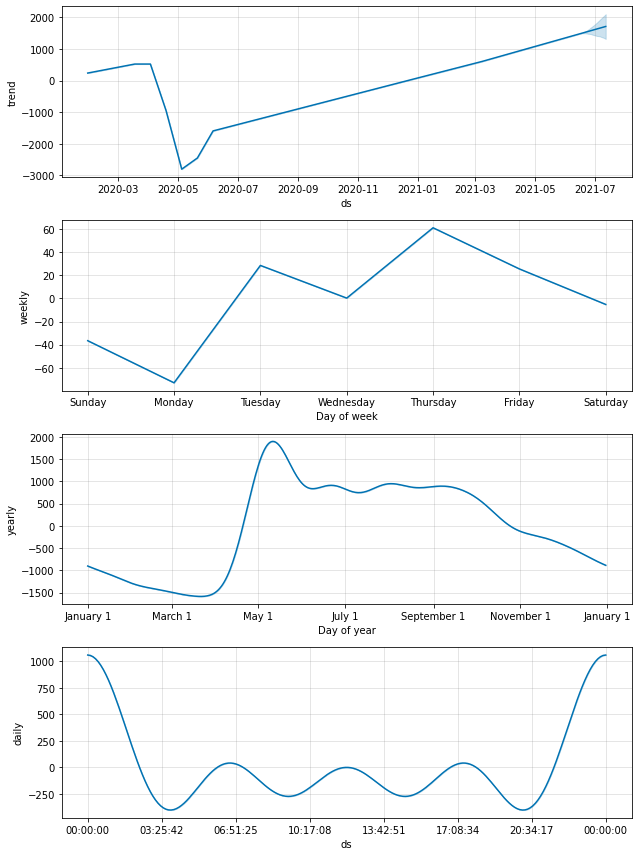

In [ ]:
fig2=model.plot_components(forecast)
#visualization in terms of daily,weekly and yearly